In [1]:
# AutoEncoerder 
# mnist の画像を使って特徴を抽出
# https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

encoding_dim = 32  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
# epoch = 5
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=4096,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.6915 - val_loss: 0.6874
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.6803 - val_loss: 0.6655
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.6331 - val_loss: 0.5718
Epoch 4/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.4967 - val_loss: 0.4052
Epoch 5/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.3615 - val_loss: 0.3222


In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 2000x400 with 20 Axes>

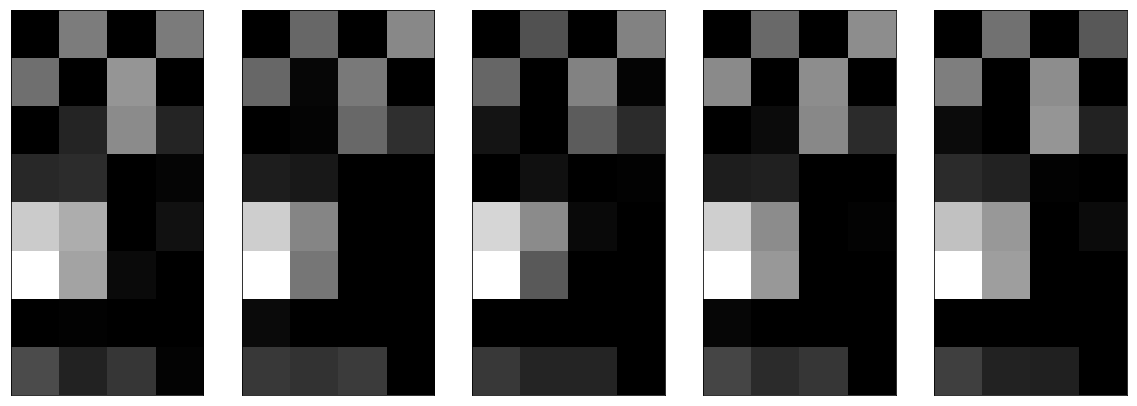

In [8]:
# 隠れ層の特徴を抽出
n = 5
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
# epoch = 20
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=4096,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.3105 - val_loss: 0.2977
Epoch 2/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2943 - val_loss: 0.2883
Epoch 3/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2871 - val_loss: 0.2834
Epoch 4/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2831 - val_loss: 0.2804
Epoch 5/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2805 - val_loss: 0.2783
Epoch 6/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2786 - val_loss: 0.2767
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2771 - val_loss: 0.2754
Epoch 8/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2758 - val_loss: 0.2743
Epoch 9/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.2747 - val_loss: 0.2733
Epoch

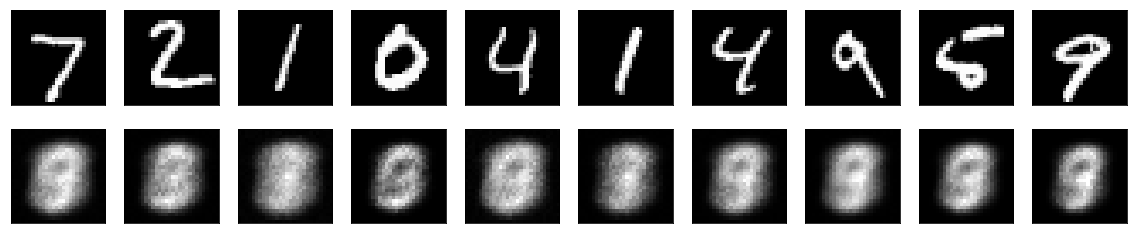

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

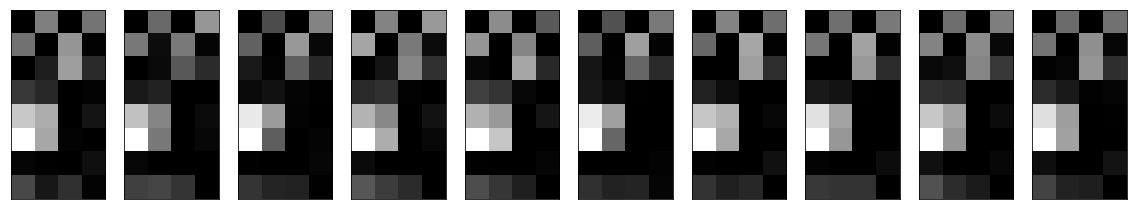

In [11]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# epoch = 50
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=4096,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 参考: 500エポック時の画像
from IPython.display import Image, display_png
display_png(Image("AE500.png"))

In [ ]:
# 参考: 1000エポック時の画像
display_png(Image("AE1000.png"))

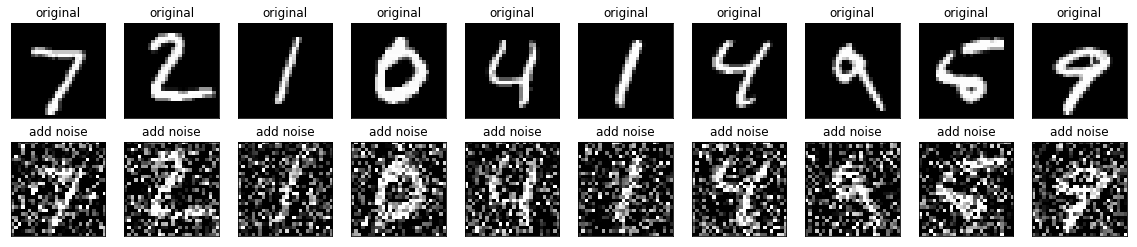

In [12]:
# Denoising
# ノイズのある画像とオリジナル画像から特徴を抽出してノイズ除去を実行
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

#ノイズ画像の生成
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.title("add noise")
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [16]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
# 学習の開始
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=4096,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5256 - val_loss: 0.4509
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.4090 - val_loss: 0.3712
Epoch 3/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2929 - val_loss: 0.2303
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2273 - val_loss: 0.2166
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2060 - val_loss: 0.1897
Epoch 6/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1880 - val_loss: 0.1838
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1762 - val_loss: 0.1683
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1682 - val_loss: 0.1655
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1630 - val_loss: 0.1585
Epoch

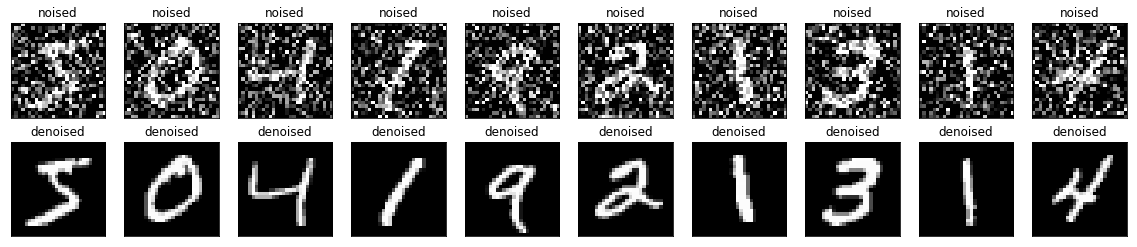

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display original
    ax = plt.subplot(2, n, i + 1)

    plt.title("noised")
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.title("denoised")
    #plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# Jupyter上でカーネルリセット&GPUメモリ解放
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()